## Instalations

In [2]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install tensorflow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Importing the packages and libraries that are required

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

## Importing dataset and perform preprocessing (EDA)

In [14]:
df = pd.read_csv("superhero dataset.csv")
df.head() # print head of uploded dataset

,height_cm,weight_kg,age,years_active,training_hours_per_week,civilian_casualties_past_year,power_level,public_approval_rating,super_strength,flight,energy_projection,telepathy,healing_factor,shape_shifting,invisibility,telekinesis,is_good
0,189.9,81.9,33,10,32.6,2,28.4,62.9,0,1,0,1,0,0,1,1,1
1,177.2,73.6,58,22,41.9,2,67.3,41.4,0,0,0,0,0,0,1,0,1
2,193.0,81.8,47,6,22.3,0,95.9,96.8,0,1,0,0,0,1,1,0,0
3,210.5,88.1,62,26,25.0,4,71.8,53.2,1,0,0,1,0,0,0,0,1
4,175.3,80.7,43,28,24.9,3,81.3,36.1,0,0,0,1,1,1,1,1,0


In [20]:
df.describe()

,height_cm,weight_kg,age,years_active,training_hours_per_week,civilian_casualties_past_year,power_level,public_approval_rating,super_strength,flight,energy_projection,telepathy,healing_factor,shape_shifting,invisibility,telekinesis,is_good
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000
mean,181.217833,80.422250,42.325833,15.095833,29.483500,1.893333,70.182333,64.615833,0.287500,0.314167,0.300833,0.304167,0.308333,0.316667,0.31500,0.318333,0.650000
std,18.831243,14.616758,11.323641,8.553905,10.117866,1.896915,15.286139,18.543736,0.452785,0.464377,0.458812,0.460245,0.461998,0.465370,0.46471,0.466024,0.477168
min,150.000000,45.000000,18.000000,0.000000,1.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,167.500000,70.375000,35.000000,8.000000,22.800000,1.000000,59.775000,52.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,181.000000,80.200000,42.000000,15.000000,29.400000,1.000000,70.200000,64.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,193.525000,90.100000,50.000000,22.000000,36.400000,3.000000,81.000000,77.425000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,250.000000,127.900000,84.000000,29.000000,61.000000,13.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   height_cm                      1200 non-null   float64
 1   weight_kg                      1200 non-null   float64
 2   age                            1200 non-null   int64  
 3   years_active                   1200 non-null   int64  
 4   training_hours_per_week        1200 non-null   float64
 5   civilian_casualties_past_year  1200 non-null   int64  
 6   power_level                    1200 non-null   float64
 7   public_approval_rating         1200 non-null   float64
 8   super_strength                 1200 non-null   int64  
 9   flight                         1200 non-null   int64  
 10  energy_projection              1200 non-null   int64  
 11  telepathy                      1200 non-null   int64  
 12  healing_factor                 1200 non-null   i

In [9]:
# Check for missing values and also duplicate value and if any then drop that rows 
print(df.isnull().sum())
df = df.dropna() # drop rows which have null values if any 

height_cm                        0
weight_kg                        0
age                              0
years_active                     0
training_hours_per_week          0
civilian_casualties_past_year    0
power_level                      0
public_approval_rating           0
super_strength                   0
flight                           0
energy_projection                0
telepathy                        0
healing_factor                   0
shape_shifting                   0
invisibility                     0
telekinesis                      0
is_good                          0
dtype: int64


In [10]:
# Check for duplicate
print(df.duplicated().sum())
df= df.drop_duplicates() # drop rows which have duplicate values if any 

0


## Split data into imput(fectures) and target(lable)

In [12]:
x = df.drop('is_good',axis=1)  
y= df['is_good'] 

## Data Visiulations

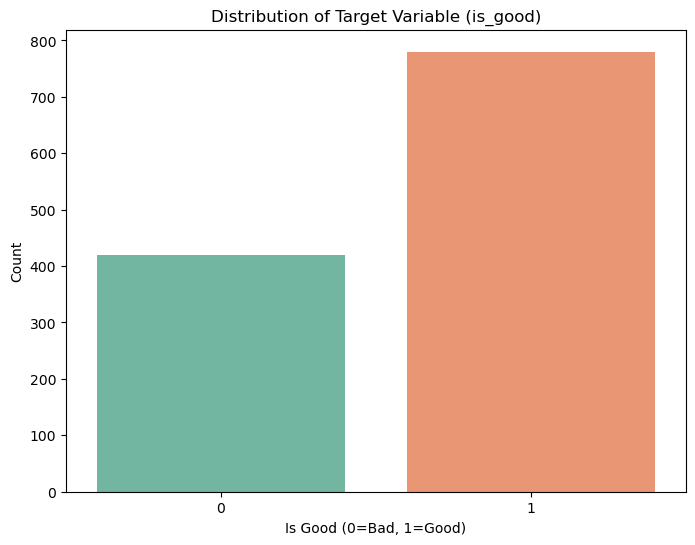

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_good', data=df,palette='Set2')
plt.title('Distribution of Target Variable (is_good)')
plt.xlabel('Is Good (0=Bad, 1=Good)')
plt.ylabel('Count')
plt.show()

In [15]:
print("Target value Distribution:")
print("\nVariable Distribution:")
print(y.value_counts())
print("\nVariable Percentages:")
print(y.value_counts(normalize=True) * 100)

Target value Distribution:

Variable Distribution:
is_good
1    780
0    420
Name: count, dtype: int64

Variable Percentages:
is_good
1    65.0
0    35.0
Name: proportion, dtype: float64


### Correlations between all input fectures 
<br>
A correlation heatmap visually displays the strength and direction of relationships between numerical variables using color, making it easy to spot which features are positively or negatively correlated. In your result, you quickly see which variable pairs have the strongest relationships and potential patterns in your data.

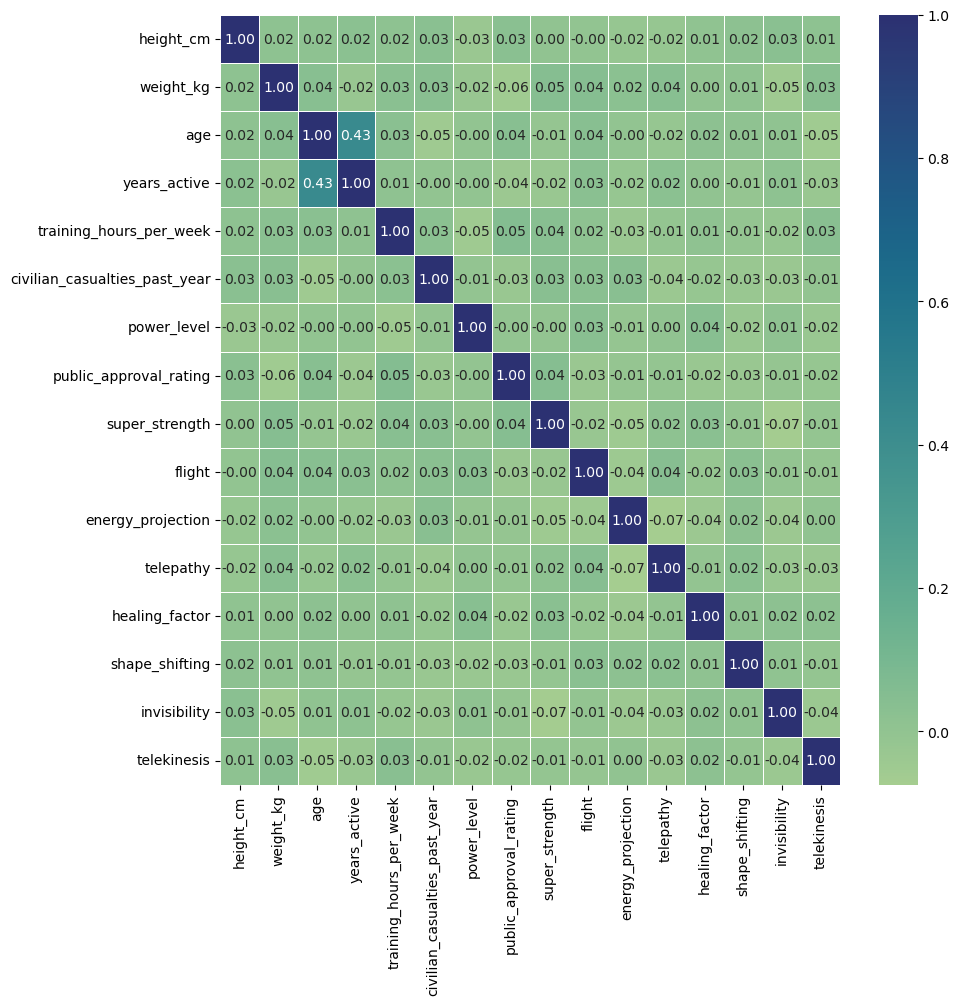

In [17]:
fig, axis = plt.subplots(figsize=(10, 10))
correlation_x = x.corr()
sns.heatmap(correlation_x, annot=True, linewidths=.5, fmt='.2f', ax=axis, cmap="crest")
plt.show()


<h4>Notably,in the dataset, input attributes are not highly correlated, making them suitable for the project.</h4>

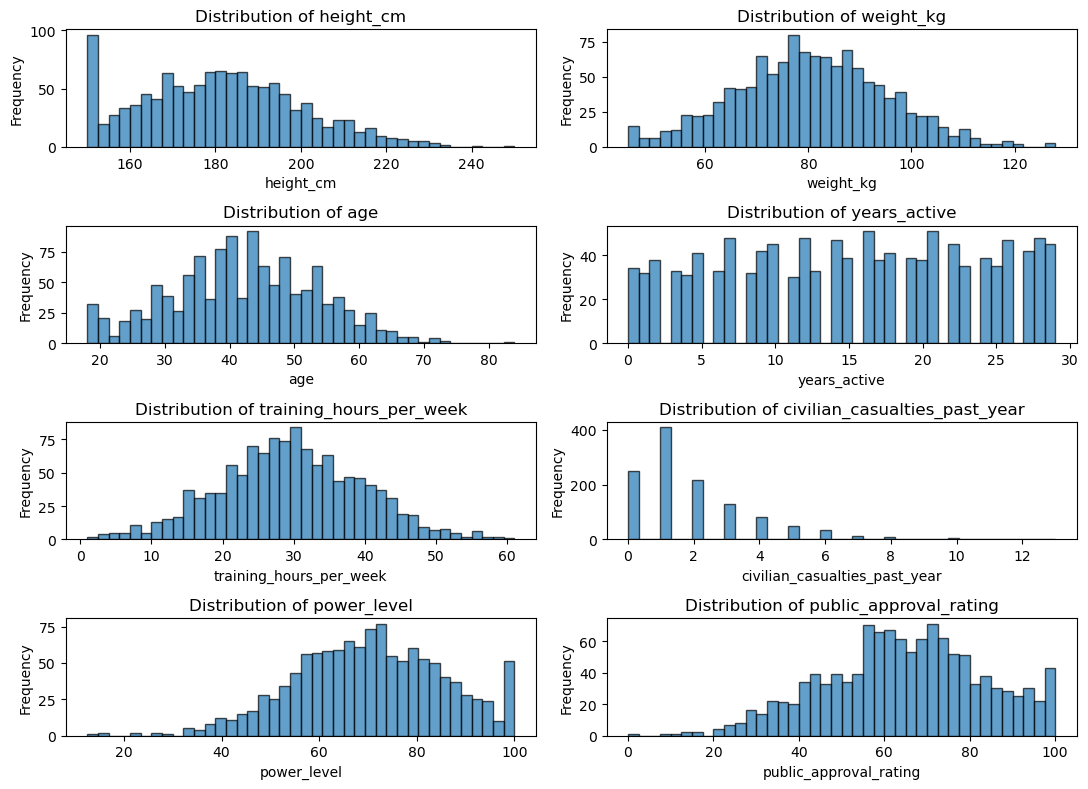

In [24]:
numerical_cols = ['height_cm', 'weight_kg', 'age', 'years_active', 
                  'training_hours_per_week', 'civilian_casualties_past_year',
                  'power_level', 'public_approval_rating']

fig, axes = plt.subplots(4, 2, figsize=(11, 8))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=40, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Observations on Feature Distributions
<li>
<ul>'height_cm', 'weight_kg', 'age', 'training_hours_per_week', 'power_level', and 'public_approval_rating' all show roughly symmetric, bell-shaped (normal-like) distributions, suggesting these features are well spread around a central value.</ul>
<ul>'years_active' is quite uniform, meaning individuals in your dataset are distributed evenly across years of activity.</ul>
<ul>'civilian_casualties_past_year' is strongly skewed right (most values are low, few are high), indicating that most entries have few casualties, but some have much higher numbers.</ul>
</li>

#### Pairplot to visualize for key fectures 

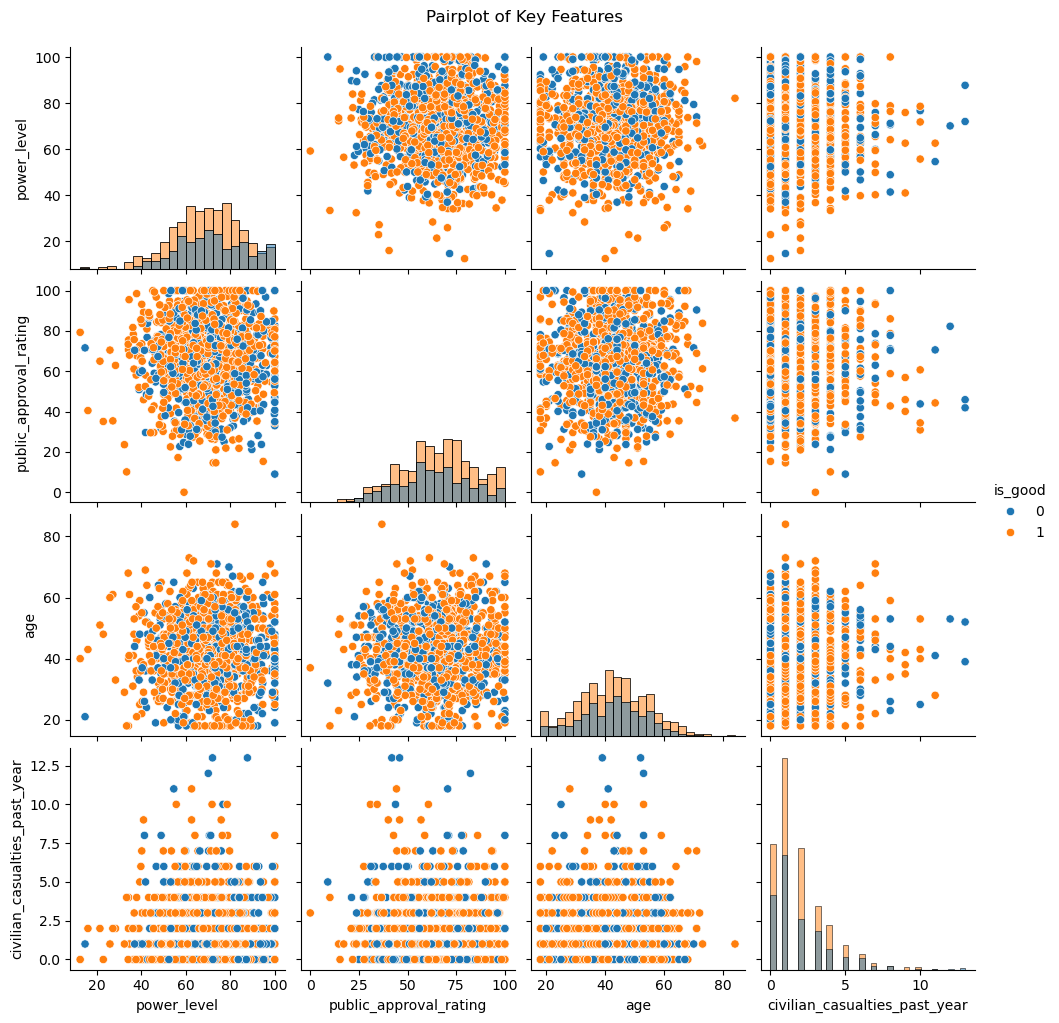

In [22]:
key_features = ['power_level', 'public_approval_rating', 'age', 
                'civilian_casualties_past_year', 'is_good']
sns.pairplot(df[key_features], hue='is_good', diag_kind='hist')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

### StandardScaler
<br>
<b>StandardScaler</b> is a preprocessing tool used in machine learning to standardize (normalize) numerical features so that each feature has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms work better when all features are on a similar scale.

How does StandardScaler work?

For each column, it subtracts the mean and divides by the standard deviation:

z = x − μ / σ

where 
x is your data value, 
μ is the mean of the feature, and 
σ is the standard deviation.

After scaling, the data points are centered around zero and have a spread (variance) of one in each column.

<h4>Its a tool that helps us take different measurements and make them all of the same scale.</h4>

In [24]:
std_scaler = StandardScaler()
normalized_x = std_scaler.fit_transform(x)

print(normalized_x[:1])

[[ 0.46124339  0.10114186 -0.82391532 -0.59598019  0.30814791  0.05625509
  -2.73448725 -0.09256758 -0.6352234   1.47750596 -0.65595285  1.51250495
  -0.66766993 -0.68074565  1.47465358  1.46333908]]


### Train Test Data Split

Splitting the dataset for training and testing means dividing your data into two distinct sets:
- Training set: Used to teach (train) the machine learning model how to find patterns and relationships in the data.

- Testing set: Used to check how well the model performs on unseen data, mimicking how it would work in the real world

why we do this?
- Data splitting prevents overfitting and provides a true evaluation of model performance.

In [26]:
# Split the data: 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to confirm
print("Training input data shape:", x_train.shape)
print("Testing input data shape:", x_test.shape)
print("Training lable shape:", y_train.shape)
print("Testing lable shape:", y_test.shape)

Training input data shape: (960, 16)
Testing input data shape: (240, 16)
Training lable shape: (960,)
Testing lable shape: (240,)


### Function for Performance metrics

<b>why is important?<br></b>
important in modeling because they measure how well your model is working, helping you compare, tune, and choose the best model for your data and goals.

<b>different terms and it meaning</b>
| Metric                       | Abbreviation             | Description                                                                      |
| ---------------------------- | ------------------------ | -------------------------------------------------------------------------------- |
| True Positive                | TP                       | Correctly predicted positive cases                                               |
| True Negative                | TN                       | Correctly predicted negative cases                                               |
| False Positive               | FP                       | Incorrectly predicted as positive                                                |
| False Negative               | FN                       | Incorrectly predicted as negative                                                |
| True Positive Rate           | TPR, Recall, Sensitivity | Percentage of actual positives correctly identified (TP / (TP + FN))             |
| True Negative Rate           | TNR, Specificity         | Percentage of actual negatives correctly identified (TN / (TN + FP))             |
| False Positive Rate          | FPR                      | Percentage of negatives incorrectly identified as positive (FP / (FP + TN))      |
| False Negative Rate          | FNR                      | Percentage of positives incorrectly identified as negative (FN / (FN + TP))      |
| Precision                    | Precision                | Proportion of predicted positives that are actually correct (TP / (TP + FP))     |
| F1 Measure                   | F1, F1_score             | Harmonic mean of precision and recall                                            |
| Accuracy                     | Accuracy                 | Percentage of all correct predictions ((TP + TN) / total samples)                |
| Error Rate                   | Error Rate               | Percentage of all incorrect predictions ((FP + FN) / total samples)              |
| Balanced Accuracy            | BACC                     | Average of TPR and TNR (0.5 * (TPR + TNR))                                       |
| True Skill Statistic         | TSS                      | Skill compared to a random guess (TPR - FPR)                                     |
| Heidke Skill Score           | HSS                      | Compares model performance to random chance                                      |
| Brier Score                  | BS, Brier_score          | Mean squared difference between predicted probabilities and actual outcomes      |
| Brier Skill Score            | BSS                      | Measures improvement of BS compared to a reference model                         |
| ROC Curve                    | ROC                      | Graph showing TPR vs FPR at various thresholds, assesses classifier performance  |
| Area Under Curve             | AUC                      | Area under the ROC curve; one-number summary of classifier's ranking performance |
| Accuracy by Package Function | Acc_by_package_fn        | Accuracy as computed by a package's built-in function                            
<br>
to get this value use confusion matrix as input parameter

In [28]:
def cal_performance_metrics(cm, y_test, y_pred, y_prob):
    TN, FP, FN, TP=cm.ravel()   #.ravel() flattens the array into 1D array

    # Calculate metrics
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    TNR = TN / (TN + FP) if (TN + FP) != 0 else 0  # True Negative Rate
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate
    TSS = TPR - FPR # True Skill Statistic
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    f1_score = 2 * TP / (2 * TP + FP + FN) if (TP + FP + FN) != 0 else 0
    Accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
    Error_rate = 1 - Accuracy  # Error Rate
    BACC = (TPR + TNR) / 2
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN)) if ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN)) != 0 else 0  # Heidke Skill Score
    bs = brier_score_loss(y_test, y_prob)
    bs_ref = brier_score_loss(y_test, np.full_like(y_test, y_test.mean()))
    bss = (bs_ref - bs) / bs_ref if bs_ref != 0 else 0
    auc = roc_auc_score(y_test, y_prob) # Area Under the Curve


    return {
        "TN": TN, "FP": FP, "FN": FN, "TP": TP,
        "TPR": TPR, "TNR": TNR, "FPR": FPR, "FNR": FNR,"TSS":TSS,"HSS" : HSS,"BACC" : BACC,
        "Precision": Precision,"f1_score" : f1_score,  "Accuracy": Accuracy, "Error_rate": Error_rate,
        "BS" : bs, "BSS" : bss, "AUC" : auc
    }

### Performing 10-fold cross-validation
10-fold cross-validation is a machine learning technique that estimates model performance on unseen data by averaging results from training on 9 folds and testing on the remaining fold.

In [30]:
 # function for cross validations 
def perform_10fold(normalized_x, y, model):
    cross_validation = KFold(n_splits=10, shuffle=True, random_state=42) #KFold() will split the data into 10 parts
    fold_metrics = []

    for fold, (train_index, test_index) in enumerate(cross_validation.split(normalized_x), 1):
        # Split the data
        X_train, X_test = normalized_x[train_index], normalized_x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Calculate confusion matrix and metrics
        cm = confusion_matrix(y_test, y_pred)
        # fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        metrics = cal_performance_metrics(cm,y_test,y_pred,y_prob)
        metrics['Fold'] = fold
        fold_metrics.append(metrics)
        
        
    return fold_metrics

## Building machine learning models for binary classifications. 


### KNN (k-nearest neighbors)

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm that classifies new data points based on their similarity to 'k' closest points in the training dataset. For classification, KNN assigns the label that is most common among the neighboring points; for regression, it averages their values. KNN does not build a model while training—instead, it stores all data and makes predictions by comparing distances when needed, which is why it's called a "lazy learner".

In [33]:
print("KNN Algoritham")
knn = KNeighborsClassifier(n_neighbors=15)

fold_metrics = perform_10fold(normalized_x, y, knn)

df_fold_knn = pd.DataFrame(fold_metrics)

avg_fold_knn = df_fold_knn.mean().to_frame(name="Avarage(Mean)")
print(df_fold_knn.round(3).T)
print(avg_fold_knn.round(3))

KNN Algoritham
                 0       1       2       3       4       5       6       7  \
TN           5.000   5.000   7.000   5.000   4.000   8.000   4.000   5.000   
FP          40.000  38.000  38.000  41.000  35.000  27.000  42.000  27.000   
FN           8.000   7.000   7.000   4.000  15.000   7.000   5.000   4.000   
TP          67.000  70.000  68.000  70.000  66.000  78.000  69.000  84.000   
TPR          0.893   0.909   0.907   0.946   0.815   0.918   0.932   0.955   
TNR          0.111   0.116   0.156   0.109   0.103   0.229   0.087   0.156   
FPR          0.889   0.884   0.844   0.891   0.897   0.771   0.913   0.844   
FNR          0.107   0.091   0.093   0.054   0.185   0.082   0.068   0.045   
TSS          0.004   0.025   0.062   0.055  -0.083   0.146   0.019   0.111   
HSS          0.005   0.030   0.072   0.064  -0.095   0.176   0.023   0.144   
BACC         0.502   0.513   0.531   0.527   0.459   0.573   0.510   0.555   
Precision    0.626   0.648   0.642   0.631   0.65

### Randome Forest 
Random Forest is a powerful and versatile supervised machine learning algorithm that builds a collection ("forest") of many decision trees. Each tree is trained on a slightly different random sample of the data and selects random subsets of features when splitting nodes, which helps make each tree unique and reduces overfitting. For classification, each tree votes for a class, and the most-voted class is chosen; for regression, the trees' outputs are averaged. This ensemble approach makes Random Forest accurate, stable, and well-suited for both classification and regression tasks.

In [35]:
print("Random Forest Alogoritham")


rf = RandomForestClassifier(min_samples_split= 10,n_estimators= 100, random_state=42)
fold_metrics=perform_10fold(normalized_x, y, rf)
df_fold_rf = pd.DataFrame(fold_metrics)
avg_fold_rf = df_fold_rf.mean().to_frame(name="Avarage(Mean)")
print(df_fold_rf.round(3).T)
print(avg_fold_rf.round(3))

Random Forest Alogoritham
                 0       1       2       3       4       5       6       7  \
TN           7.000   6.000   5.000   8.000   9.000   5.000   4.000   6.000   
FP          38.000  37.000  40.000  38.000  30.000  30.000  42.000  26.000   
FN           5.000   8.000   4.000   7.000  10.000  11.000   6.000   5.000   
TP          70.000  69.000  71.000  67.000  71.000  74.000  68.000  83.000   
TPR          0.933   0.896   0.947   0.905   0.877   0.871   0.919   0.943   
TNR          0.156   0.140   0.111   0.174   0.231   0.143   0.087   0.188   
FPR          0.844   0.860   0.889   0.826   0.769   0.857   0.913   0.812   
FNR          0.067   0.104   0.053   0.095   0.123   0.129   0.081   0.057   
TSS          0.089   0.036   0.058   0.079   0.107   0.013   0.006   0.131   
HSS          0.104   0.042   0.069   0.091   0.124   0.016   0.007   0.165   
BACC         0.544   0.518   0.529   0.540   0.554   0.507   0.503   0.565   
Precision    0.648   0.651   0.640   0

### LSTM (Long-Short Term Memory)
LSTM (Long Short-Term Memory) is an advanced recurrent neural network architecture designed to overcome the limitations of standard RNNs by maintaining long-term dependencies via specialized memory cells and gates. It is widely used in sequential data tasks like language modeling, speech recognition, and time series analysis.

In [37]:
# Reshape the training and testing data to 3D shape for LSTM
x_train_lstm = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test_lstm = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

# Performing one-hot encoding
y_train_lstm = to_categorical(y_train)
y_test_lstm = to_categorical(y_test)


# Function to build LSTM model
def lstm_model(input_shape):
    # Build the LSTM model
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
    
cross_validation = KFold(n_splits=10, shuffle=True, random_state=42)
fold_metrics = []

# for fold, (train_index, test_index) in enumerate(cross_validation.split(normalized_x), 1):
#         # Split the data
#         X_train, X_test = normalized_x[train_index], normalized_x[test_index]
#         y_train, y_test = y[train_index], y[test_index]
        
#         # Train and predict
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         y_prob = model.predict_proba(X_test)[:, 1]
        
#         # Calculate confusion matrix and metrics
#         cm = confusion_matrix(y_test, y_pred)
#         # fpr, tpr, _ = roc_curve(y_test, y_prob)
#         auc = roc_auc_score(y_test, y_prob)
#         metrics = cal_performance_metrics(cm,y_test,y_pred,y_prob)
#         metrics['Fold'] = fold
#         fold_metrics.append(metrics)
        

for fold, (train_index, test_index) in enumerate(cross_validation.split(x_train_lstm, y_train_lstm), 1):
    # Split the data
    x_train, x_test = normalized_x[train_index], normalized_x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Reshape data for LSTM input (samples, timesteps, features)
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
    
    # Debugging step: print shapes
    print(f"Fold {fold}: x_train shape = {x_train.shape}")

    # Create a new LSTM model with the input shape of the training data
    model = lstm_model(x_train.shape[1:])

    # Train the LSTM model
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions
    y_prob = model.predict(x_test).reshape(-1)
    y_pred = (y_prob > 0.5).astype(int)
    # y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    metrics = cal_performance_metrics(cm,y_test, y_pred,y_prob)
    
    metrics['Fold'] = fold
    fold_metrics.append(metrics)


df_fold_lstm = pd.DataFrame(fold_metrics)
avg_fold_lstm = df_fold_lstm.mean().to_frame(name="Average(Mean)")
print(df_fold_lstm.round(3).T)  
print(avg_fold_lstm.round(3))


Fold 1: x_train shape = (864, 16, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 2: x_train shape = (864, 16, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 3: x_train shape = (864, 16, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 4: x_train shape = (864, 16, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 5: x_train shape = (864, 16, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Fold 6: x_train shape = (864, 16, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 7: x_train shape = (864, 16, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 8: x_train shape = (864, 16, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 9: x_train shape = (864, 16, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 10: x_train shape = (864, 16, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
                 0       1       2       3       4       5       6       7  \
TN           0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
FP          30.000  37.000  41.000  29.000  31.000  43.000  33.000  29.000   
FN           0.

### Comparing all the Averages of Algorithms

In [39]:
print('Comparing the average for all Algorithms')
averages_combined = pd.concat([avg_fold_knn, avg_fold_rf, avg_fold_lstm], axis=1)
averages_combined.columns = ["kNN average", "Random Forest average", "LSTM average"]

# Print the averages
print(averages_combined)

Comparing the average for all Algorithms
            kNN average  Random Forest average  LSTM average
TN             5.700000               6.300000      0.000000
FP            36.300000              35.700000     34.400000
FN             7.600000               6.300000      0.000000
TP            70.400000              71.700000     61.600000
TPR            0.902386               0.919836      1.000000
TNR            0.137145               0.152252      0.000000
FPR            0.862855               0.847748      1.000000
FNR            0.097614               0.080164      0.000000
TSS            0.039532               0.072089      0.000000
HSS            0.047592               0.085776      0.000000
BACC           0.519766               0.536044      0.500000
Precision      0.659680               0.668051      0.641667
f1_score       0.761304               0.772854      0.780617
Accuracy       0.634167               0.650000      0.641667
Error_rate     0.365833               0.3500

## Analysis 

#### Comparative Analysis of Algorithms
<b>True Positives (TP) and True Negatives (TN)</b>
- Random Forest demonstrates superior performance in identifying positive cases, attaining the highest average True Positives (approximately 71.7). This indicates that it accurately classified a greater number of positive instances. kNN exhibits a slight advantage over Random Forest in terms of True Negatives (around 5.7), while LSTM exhibits significant challenges in correctly identifying negative cases. The True Negative rate for LSTM is nearly zero, suggesting a frequent mislabeling of negative instances.

<b>False Positives (FP) and False Negatives (FN)</b>
- LSTM exhibits the highest false positive rate (around 34.4), resulting in incorrect predictions of numerous negative cases as positive. Random Forest and kNN also exhibit significant false positives, although Random Forest achieves the lowest false negative rate (around 6.3), which is crucial for tasks where missing true positive cases would be costly or critical. kNN slightly surpasses Random Forest in terms of false negative rate.

<b>True Positive Rate (TPR) and True Negative Rate (TNR)</b>
- LSTM achieves a perfect TPR (1.0), capturing all actual positive instances in the data. However, it severely suffers from the lowest TNR (0), significantly impacting its overall accuracy. Random Forest strikes a better balance by achieving a TPR of around 0.92 and demonstrating a slight improvement in TNR compared to kNN.

<b>Precision and Accuracy</b>
- Random Forest holds the edge in precision (near 0.67), meaning among cases it predicts positive, more are actually positive compared to the other models. It also leads in overall accuracy (~65%), indicating it makes more correct predictions than both LSTM and kNN.

<b>Other metrics (F1, Balanced Accuracy, Brier Score, etc.) </b>
- All models show comparable F1 Scores, with LSTM slightly edging others, indicating a trade-off between precision and recall. Balanced accuracy and error rates support the preference for Random Forest as the most stable across positive and negative classes.

#### Why Random Forest Performs Better in This Case
The superhero dataset comprises a diverse range of data types, including both continuous features (such as height, weight, and training hours) and categorical features (powers and abilities). Random Forest stands out as an effective algorithm for handling such mixed data environments. It demonstrates proficiency in managing various feature types, does not necessitate extensive data scaling, and exhibits resilience against overfitting due to its ensemble of decision trees.
<br>
In contrast:
- kNN’s reliance on distance metrics and feature scaling makes it less effective with widely varying features or high dimensionality.
-  LSTM, specifically designed for sequential data such as time series or natural language, is not well-suited for this tabular superhero dataset. It tends to overfit rapidly without proper tuning and performs poorly on negative cases, as evidenced by its low TNR and high false positives.

### Conclusion
#### Random Forest is the best model for this classification problem. It balances sensitivity to positive cases and acceptable performance on negative cases and overall accuracy.

### Implementing ROC



In [43]:
from sklearn.metrics import roc_curve, auc

x_train_roc = x_train.reshape(x_train.shape[0], x_train.shape[1])  # squeeze last dim
x_test_roc = x_test.reshape(x_test.shape[0], x_test.shape[1])


#### KNN


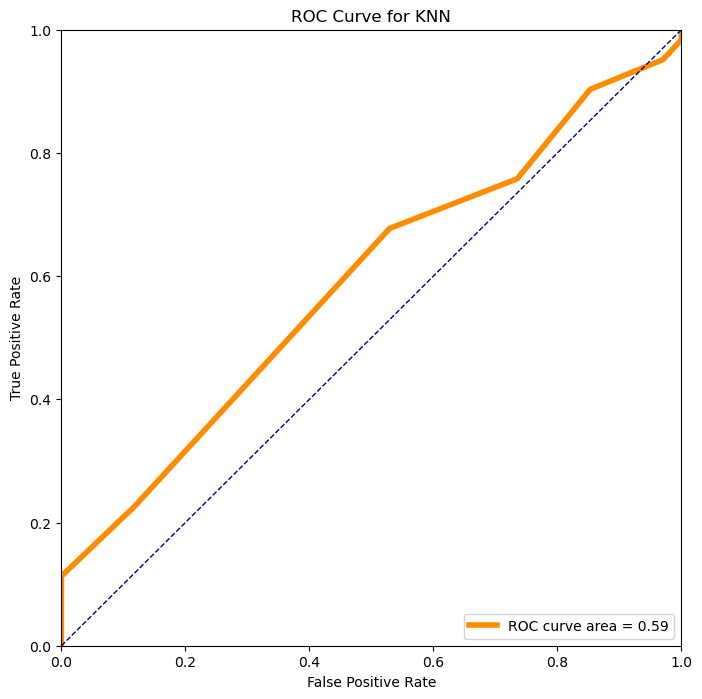

In [50]:
knn_roc = KNeighborsClassifier(n_neighbors=15)
knn_roc.fit(x_train_roc, y_train)

y_pred = knn.predict(x_test_roc)
y_prob = knn.predict_proba(x_test_roc)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=4, label= f'ROC curve area = {(roc_auc).round(2)}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

#### Randome Forest


In [47]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=42)
rf.fit(x_train_roc, y_train)

y_pred = rf.predict(x_test_2d)
y_prob = rf.predict_proba(x_test_2d)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='green', lw=4, label=f'ROC curvecurve area = {(roc_auc).round(2)}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


NameError: name 'x_test_2d' is not defined

#### LSTM


In [ ]:
x_train_roc = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_roc = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(x_train_roc.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.fit(x_train_roc, y_train, epochs=10, batch_size=32, verbose=0)

y_prob = lstm_model.predict(x_test_roc).flatten()
y_pred = (y_prob >= 0.5).astype(int)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curvecurve area = {(roc_auc).round(2)}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM')
plt.legend(loc='lower right')
plt.show()